# El objetivo de este cuaderno es mostrar un resumen de los scripts


Vamos a comenzar visualizando la frecuencia l1 para ello importamos `funcionesdef.py`.
Además vamos a meter todos los archivos de `datos` en una lista 

In [6]:
from funcionesdef import*
import numpy
import os 


carpeta_datos = 'datos'
archivos = [os.path.join(carpeta_datos, archivo) for archivo in os.listdir(carpeta_datos) if os.path.isfile(os.path.join(carpeta_datos,archivo))]
archivos.remove('datos/read.txt')
archivos

['datos/VIGO359A00.22O',
 'datos/MAD1060A0030s.23O',
 'datos/MAD1047A00.23O',
 'datos/TERU042A00.23O',
 'datos/GRA1065Q00.23O',
 'datos/MAD1060R001s.23O',
 'datos/MAD100ESP_R_20230470000_01D_30S_MO.rnx',
 'datos/MAD100ESP_R_20230470000_01D_30S_MO.crx']

Vamos a graficar todos los datos relacionados con los satélites de un archivo en concreto y después eligiremos un satélite en concreto

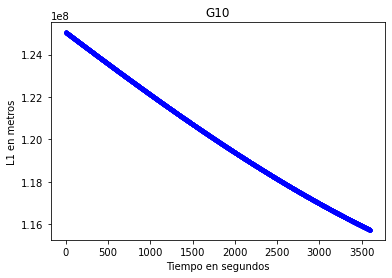

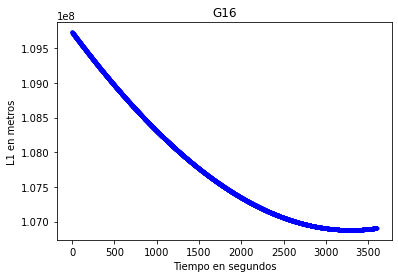

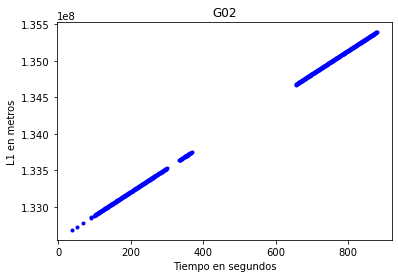

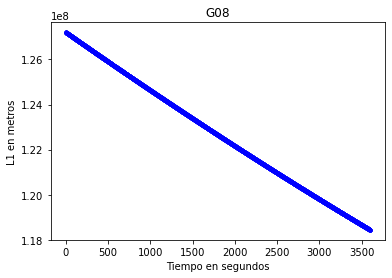

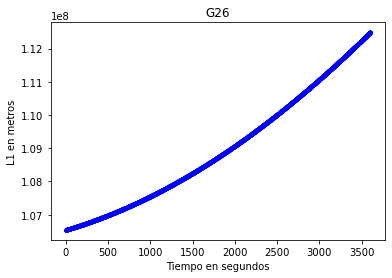

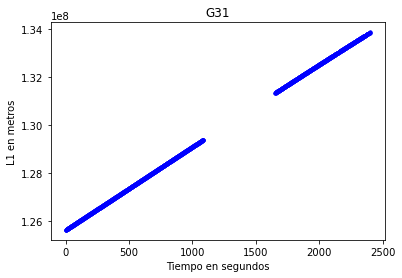

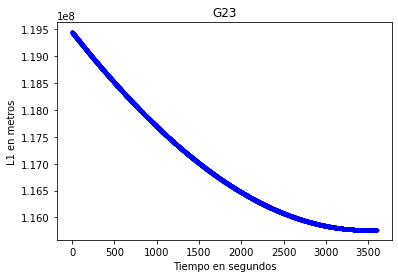

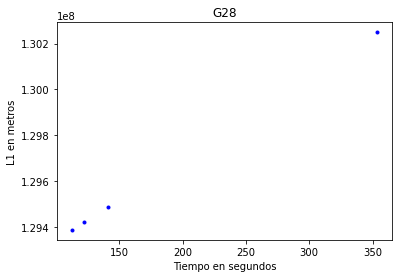

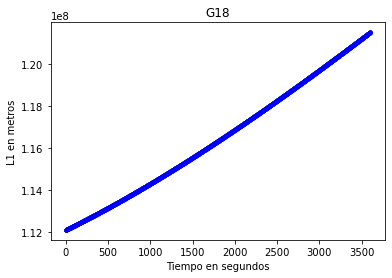

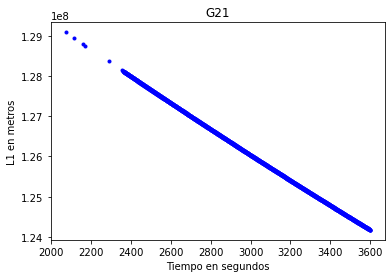

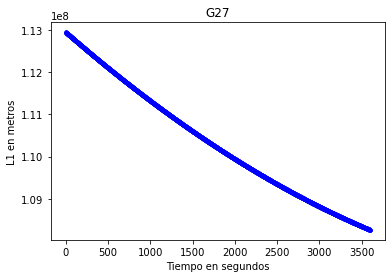

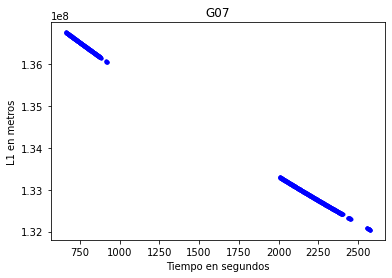

In [10]:
Granada = archivos[4]
dict_Granada = all_information2(Granada)
graficar_frec(Granada,3)

Ahora vamos a utilizar estos datos para implementar los siguientes algoritmos para el satélite *G23*

In [8]:
sat = 'G23'
l1 = L1(Granada, sat)
l2 = L2(Granada, sat)


## Métodos multifrecuencia

#### Combinación libre de geometría L1-L2

Utilizamos un polinomio para interpolar 10 valores, establecemos como umbral la media + desviación típica de los residuos de |valor_polinomio-valor_observado|

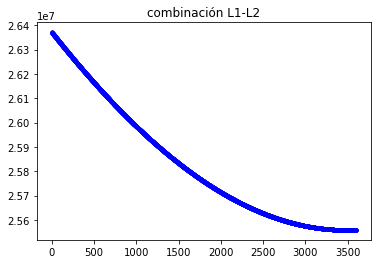

In [11]:
from combinacion_libre_geo import algoritmo
N = 10
datos = f1menosf2(l1,l2)
saltos = algoritmo(datos,N)
saltos_geo = [ i for i in saltos if i !=0]

### Combinación libre de ionosfera
Realizaremos un proceso análogo al anterior

In [1]:
from funcionesdef import combinacion_libre_ios

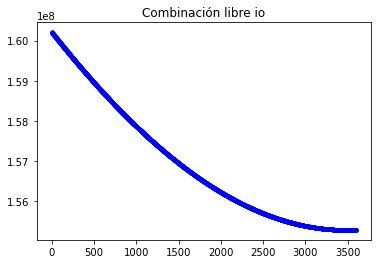

In [9]:
from combinacion_libre_io import algoritmo
N = 10
datos = combinacion_libre_ios(l1, l2)
saltos = algoritmo(datos,N)
saltos_io = [ i for i in saltos if i !=0]

### Comparación de saltos de la combinación libre de geometría e ionosfera
Observación: el algoritmo realiza un proceso análogo a esto que realizaré a continuación

In [14]:
print(f"Saltos de ciclo detectados con la combinación libre de geometría son: \n{saltos_geo}\n Saltos de ciclo detectados con la combinación libre de ionosfera son: \n{saltos_io}\n")
saltos_comunes = list(set(saltos_geo) & set(saltos_io))
saltos_nocomunes = list(set(saltos_geo) ^ set(saltos_io))
print(f"\nEl % de saltos de comunes {len(saltos_comunes)/(len(saltos_comunes)+len(saltos_nocomunes))}")
saltos_nocomunes


Saltos de ciclo detectados con la combinación libre de geometría son: 
[31, 33, 34, 35, 36, 37, 38, 161, 163, 164, 167, 168, 171, 172, 173, 174, 175, 176, 177, 178, 181, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 195, 196, 198, 199, 201, 203, 204, 205, 206, 207, 208, 231, 232, 233, 235, 254, 255, 257, 258, 261, 263, 267, 269, 271, 273, 275, 276, 279, 284, 285, 286, 287, 288, 291, 293, 294, 295, 296, 297, 298, 301, 303, 304, 307, 308, 311, 312, 313, 314, 317, 318, 319, 334, 335, 337, 338, 341, 342, 343, 344, 345, 346, 347, 355, 358, 361, 362, 363, 368, 369, 923, 1251, 1504, 1507, 2001, 2004, 2005, 2008, 2009, 2029, 2131, 2133, 2171, 2173, 2174, 2176, 2177, 2238, 2271, 2347, 2361, 2362, 2363, 2385, 2395, 2397, 2404, 2431, 2434, 2437, 2438, 2441, 2443, 2444, 2446, 2447, 2448, 2563, 2565, 2567, 2568, 2573, 2574, 2578, 2579]
 Saltos de ciclo detectados con la combinación libre de ionosfera son: 
[31, 33, 34, 35, 36, 37, 38, 161, 163, 164, 167, 168, 171, 172, 173, 174, 175, 176, 177, 

[3098, 2385, 2007]

Ahora podríamos realizar un estudio sobre esos valores para ver que sucede con esos valores

## Métodos de simple frecuencia

### Algoritmo basado en clustering la idea es analizar los saltos de ciclo en función de los clústers

RANGO entre 0 30
{0}


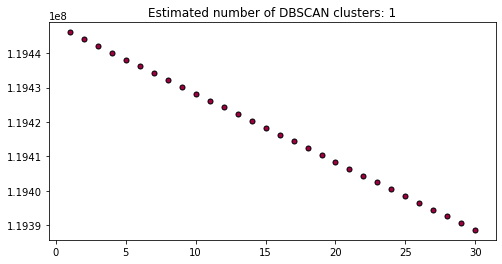

RANGO entre 30 60


KeyboardInterrupt: 

In [16]:
from clustering import algoritmo
N = 30
tiempo = 1
algoritmo(l1,N,tiempo)